labeled sample_images for comparison of predictions with ground_truth labels
data at https://universe.roboflow.com/ofpreyklmbl-fkds/apples-3dpiq

In [1]:
from ultralytics import YOLO
from roboflow import Roboflow

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import shutil
import random
import torch

In [2]:
def run_images(model: YOLO, image_folder: str) -> None:
    path_to_imgs = image_folder
    names = model.names

    for file in os.listdir(path_to_imgs):

        if not file.lower().endswith(('.jpg', '.png', '.bmp', 'jpeg')):
            continue
        
        list_of_centers = []
        image_path = os.path.join(path_to_imgs, file)
        image = cv2.imread(image_path)
        height, width, _ = image.shape

        results = model.predict(image, conf=0.5)[0]

        image_copy = image.copy()
        detections = results.boxes.xyxy.cpu().numpy()
        classes = results.boxes.cls.cpu().numpy()
        
        for i, detection in enumerate(detections):
            predict_cls = names[classes[i]]
            if predict_cls != 'apple':
                continue

            x_center = int((detection[0] + detection[2]) / 2)
            y_center = int((detection[1] + detection[3]) / 2)
            list_of_centers.append((x_center, y_center))
            
            cv2.circle(image_copy, (x_center, y_center), 25, (255, 0, 0), -1)

        

        formatted_rel_list_of_centers = [ '%.2f' % (elem[0]/width) + ', ' + '%.2f' % (elem[1]/height) for elem in list_of_centers ]
        print(f'List of centers for {file}\nAbsolute values {list_of_centers}\nRelative values {formatted_rel_list_of_centers}')

        # Проверяем, соответствуют ли предсказания меткам
        label_path = os.path.join(path_to_imgs, os.path.basename(file)[0]+'.txt')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                
                labels = f.readlines()
                true_predictions = 0

                
                
                for center in list_of_centers:
                    
                    closest_dist = float("inf")
                    closest_box = None  
                    for i, label in enumerate(labels):
                        _, x, y, w, h = map(float, label.split())
                        x_center_label = int(x * width)
                        y_center_label = int(y * height)
                        x_left_label = int((x-w)*width) if x-w >= 0 else 0
                        x_right_label = int((x+w)*width) if x+w <= width else width
                        y_top_label = int((y-h)*height) if y-h >= 0 else 0
                        y_down_label = int((y+h)*height) if y+h <= height else height
                        cv2.circle(image_copy, (x_center_label, y_center_label), 25, (0, 0, 255), -1)

                        if (
                                np.sqrt((center[0] - x_center_label)**2 + (center[1] - y_center_label)**2) < closest_dist and
                                x_left_label <= center[0] <= x_right_label and
                                y_top_label <= center[1] <= y_down_label
                            ):
                            
                            closest_dist = np.sqrt((center[0] - x_center_label)**2 + (center[1] - y_center_label)**2)
                            closest_box = i

                    if closest_box is not None:
                        true_predictions +=1
                

                print(f'True predictions for {file}: {true_predictions} out of {len(labels)}, accuracy: {true_predictions/len(labels):.2f}')
        else:
            print(f'No label file found for {file}')


        # Отображаем измененное изображение
        image_copy = cv2.resize(image_copy, (640, 448))
        plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
        plt.title('Image with centers')
        plt.show()


Модель: yolov8m >>>

0: 448x640 13 apples, 1 orange, 6.5ms
Speed: 3.0ms preprocess, 6.5ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
List of centers for 1.JPG
Absolute values [(3457, 3583), (3794, 1901), (2260, 3054), (294, 1381), (632, 1160), (3337, 2939), (542, 1465), (3727, 1468), (2315, 2364), (126, 1746), (3486, 1441), (1867, 3061), (3277, 1615)]
Relative values ['0.62, 0.96', '0.68, 0.51', '0.40, 0.82', '0.05, 0.37', '0.11, 0.31', '0.59, 0.78', '0.10, 0.39', '0.66, 0.39', '0.41, 0.63', '0.02, 0.47', '0.62, 0.38', '0.33, 0.82', '0.58, 0.43']
True predictions for 1.JPG: 13 out of 26, accuracy: 0.50


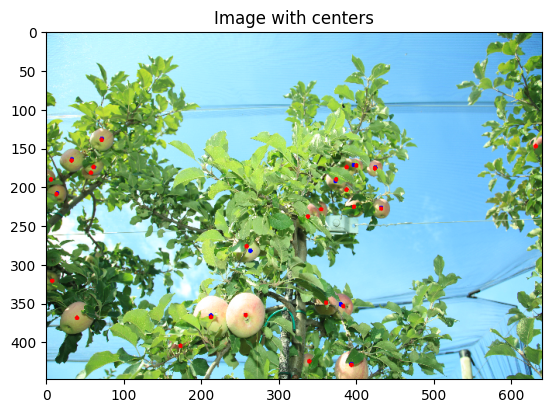


0: 448x640 2 apples, 1 orange, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
List of centers for 2.JPG
Absolute values [(3658, 1456), (4383, 945)]
Relative values ['0.65, 0.39', '0.78, 0.25']
True predictions for 2.JPG: 2 out of 2, accuracy: 1.00


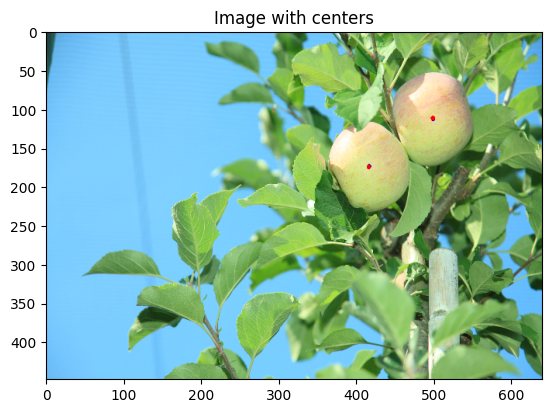


0: 448x640 1 car, 15 apples, 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
List of centers for 3.JPG
Absolute values [(2728, 3316), (2702, 1863), (1434, 1911), (2835, 2153), (1722, 2411), (1797, 1454), (3404, 2314), (2974, 3542), (2501, 1185), (1596, 3432), (3252, 2705), (3063, 2796), (2075, 1184), (3602, 3241), (2229, 3651)]
Relative values ['0.49, 0.89', '0.48, 0.50', '0.26, 0.51', '0.50, 0.58', '0.31, 0.64', '0.32, 0.39', '0.61, 0.62', '0.53, 0.95', '0.45, 0.32', '0.28, 0.92', '0.58, 0.72', '0.55, 0.75', '0.37, 0.32', '0.64, 0.87', '0.40, 0.98']
True predictions for 3.JPG: 15 out of 25, accuracy: 0.60


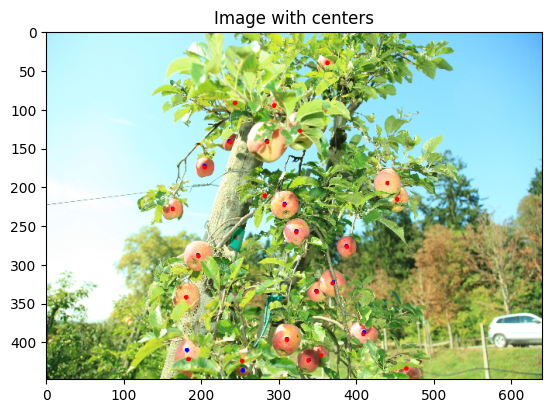


0: 384x640 5 apples, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
List of centers for 4.png
Absolute values [(728, 600), (690, 267), (630, 292), (518, 233), (704, 322)]
Relative values ['0.57, 0.83', '0.54, 0.37', '0.49, 0.41', '0.40, 0.32', '0.55, 0.45']
True predictions for 4.png: 5 out of 18, accuracy: 0.28


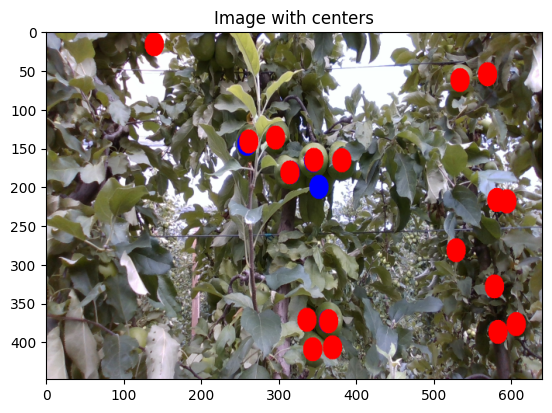


0: 384x640 5 apples, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
List of centers for 5.png
Absolute values [(707, 526), (1102, 304), (604, 459), (471, 186), (1187, 502)]
Relative values ['0.55, 0.73', '0.86, 0.42', '0.47, 0.64', '0.37, 0.26', '0.93, 0.70']
True predictions for 5.png: 5 out of 19, accuracy: 0.26


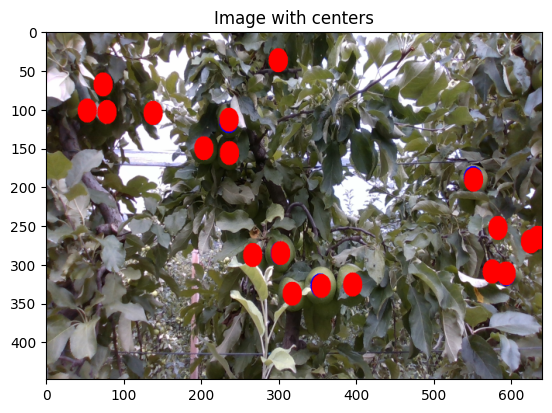


0: 384x640 5 apples, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
List of centers for 6.png
Absolute values [(584, 458), (1114, 114), (691, 635), (1236, 300), (548, 417)]
Relative values ['0.46, 0.64', '0.87, 0.16', '0.54, 0.88', '0.97, 0.42', '0.43, 0.58']
True predictions for 6.png: 5 out of 11, accuracy: 0.45


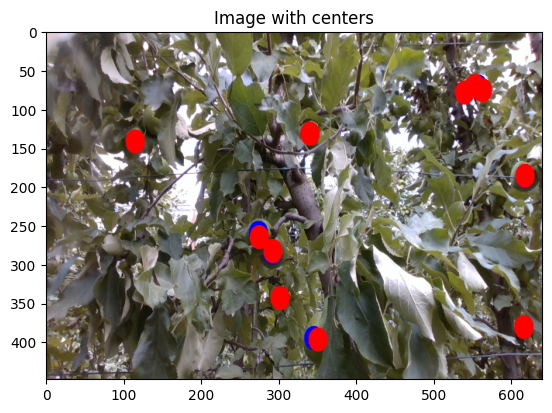

In [46]:
#model_versions = ['n', 's', 'm', 'l']
model_versions = ['m']
path_to_imgs = 'sample_images/'

for version in model_versions:

    model_name = f'yolov8{version}'
    print(f"\nМодель: {model_name} >>>")
    

    model = YOLO(f'yolov8{version}.pt')
    run_images(model, path_to_imgs)





# ENG
 Pre-trained YOLOv8 models with a set value of `conf=0.5` still skips objects on images 1-3. This may indicate that some objects were not detected due to the model's low confidence in their presence. On images 4-6 the situation is worse, as the model coudn't recognize most objects. This may be related to various factors such as complex lighting conditions, object overlap, or poor image quality. The results with lowering `conf` and applying different model versions (n, s, m, l) did not resolve the situation, indicating the need for further optimization and refinement of the model to improve its performance.

# RUS
 
Предобученные модели YOLOv8 с установленным значением `conf=0.5` все еще пропускает объекты на изображениях 1-3. Это может указывать на то, что некоторые объекты не были обнаружены из-за низкой уверенности модели в их наличии. На изображениях 4-6 ситуация еще более выражена, так как модель пропускает большинство объектов. Это может быть связано с различными факторами, такими как сложные условия освещения, перекрытие объектов или недостаточное качество изображений. Результаты с понижением `conf` и применением различных версий модели (n, s, m, l) не решили ситуацию, что указывает на необходимость дальнейшей оптимизации и доработки модели для улучшения ее производительности.

Let's try fine-tuning model in publicly avaliable datasets


In [6]:
rf = Roboflow(api_key="-------------------------------") # YOUR API KEY
project = rf.workspace("ofpreyklmbl-fkds").project("this-apple-9rpse")
version = project.version(1)
dataset = version.download("yolov8")
                
                
                

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.68, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to This-Apple-1 in yolov8:: 100%|██████████| 1146/1146 [00:00<00:00, 2672.42it/s]


In [2]:
# Проверка доступности CUDA
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Используется устройство: {device}")

model = YOLO('yolov8m.pt')

training_args = {
    'data': 'This-Apple-1/data.yaml',  # путь к файлу конфигурации данных
    'epochs': 100,
    'imgsz': 640,
    'batch': 8,
    'device': device,
    'save': True,
    'project': 'apple_detection',
    'name': '100m',
    #'mosaic': 1.0,
    #'mixup': 0.7,
    #'scale': 0.7,
    #'hsv_s': 0.7,
}

results = model.train(**training_args)

Используется устройство: cuda
New https://pypi.org/project/ultralytics/8.3.49 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.68  Python-3.12.2 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=This-Apple-1/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=apple_detection, name=100m3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, re

Create a Git repo (`git init`) and commit (`git commit`).


DVCLive is detected and auto logging is enabled (run 'yolo settings dvc=False' to disable).
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed 


`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
train: Scanning F:\PycharmProjects\randoms\test_PeK\This-Apple-1\train\labels.cache... 396 images, 0 backgrounds, 0 corrupt: 100%|██████████| 396/396 [00:00<?, ?it/s]Scanning F:\PycharmProjects\randoms\test_PeK\This-Apple-1\train\labels.cache... 396 images, 0 backgrounds, 0 corrupt: 100%|██████████| 396/396 [00:00<?, ?it/s]
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.22 (you have 1.4.12). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning F:\PycharmProjects\randoms\test_PeK\This-Apple-1\valid\labels.cache... 113 images, 0 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<?, ?it/s]Scanning F:\PycharmProjects\randoms\test_PeK\This-Apple-1\valid\labels.cache... 113 images, 0 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<?, ?it/s]


Plotting labels to apple_detection\100m3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to apple_detection\100m3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.75G      1.186      1.218      1.327         49        640: 100%|██████████| 50/50 [00:08<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.50it/s]


                   all        113        963      0.867      0.735      0.827      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       3.8G      1.257     0.8935      1.371         62        640: 100%|██████████| 50/50 [00:07<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.43it/s]


                   all        113        963      0.637      0.747       0.64      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.79G      1.259     0.8996      1.382         65        640: 100%|██████████| 50/50 [00:06<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.73it/s]


                   all        113        963      0.459      0.302      0.252      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.83G      1.252     0.8832      1.383         46        640: 100%|██████████| 50/50 [00:06<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.39it/s]


                   all        113        963      0.679       0.62      0.587      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.86G      1.201     0.8673      1.356         39        640: 100%|██████████| 50/50 [00:06<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.71it/s]


                   all        113        963      0.841      0.777      0.864      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.78G      1.231      0.849      1.374         38        640: 100%|██████████| 50/50 [00:06<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.76it/s]


                   all        113        963      0.816        0.8      0.873      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.81G      1.182     0.7744      1.352        202        640: 100%|██████████| 50/50 [00:06<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.74it/s]


                   all        113        963      0.822      0.837      0.875      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.78G      1.174     0.7466      1.317         30        640: 100%|██████████| 50/50 [00:06<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.67it/s]


                   all        113        963       0.86      0.838      0.897       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.85G      1.144     0.7543      1.317         15        640: 100%|██████████| 50/50 [00:06<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.08it/s]


                   all        113        963      0.872      0.822      0.911      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       3.8G      1.168     0.7275      1.316         39        640: 100%|██████████| 50/50 [00:06<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.94it/s]


                   all        113        963      0.869      0.851      0.913      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.84G      1.141     0.6953       1.29         53        640: 100%|██████████| 50/50 [00:06<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.97it/s]


                   all        113        963      0.859      0.835      0.901      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       3.8G      1.091     0.6751      1.299         38        640: 100%|██████████| 50/50 [00:06<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.61it/s]


                   all        113        963      0.851      0.854      0.914      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.77G      1.149     0.7259      1.342         32        640: 100%|██████████| 50/50 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.96it/s]


                   all        113        963      0.841      0.836      0.903      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.76G      1.118     0.6676      1.301         34        640: 100%|██████████| 50/50 [00:07<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.26it/s]


                   all        113        963      0.835      0.856      0.909      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.79G      1.102     0.6908      1.291         43        640: 100%|██████████| 50/50 [00:06<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.81it/s]


                   all        113        963      0.894      0.809      0.913      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.84G      1.078     0.6661      1.271         43        640: 100%|██████████| 50/50 [00:06<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.52it/s]


                   all        113        963      0.865      0.836      0.913      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.84G      1.076     0.6544      1.265         68        640: 100%|██████████| 50/50 [00:06<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.07it/s]


                   all        113        963      0.863      0.855      0.916      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.95G      1.082     0.6522      1.294         23        640: 100%|██████████| 50/50 [00:06<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.10it/s]


                   all        113        963      0.903      0.836      0.925       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       3.8G      1.093     0.6485      1.287         34        640: 100%|██████████| 50/50 [00:06<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.96it/s]


                   all        113        963      0.851      0.852      0.912      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.84G      1.083     0.6466      1.283         45        640: 100%|██████████| 50/50 [00:06<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.88it/s]


                   all        113        963      0.888      0.848      0.932      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.87G      1.045      0.609      1.242         53        640: 100%|██████████| 50/50 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.02it/s]


                   all        113        963      0.894      0.833      0.918      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.83G      1.032     0.6019      1.233         48        640: 100%|██████████| 50/50 [00:06<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.00it/s]


                   all        113        963      0.909      0.838      0.924      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       3.8G      1.071     0.6115      1.258         58        640: 100%|██████████| 50/50 [00:06<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.96it/s]


                   all        113        963      0.884      0.837      0.923      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.83G      1.033     0.6061      1.243         17        640: 100%|██████████| 50/50 [00:06<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.50it/s]


                   all        113        963      0.863       0.87      0.928      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.84G      1.052     0.5837      1.236         75        640: 100%|██████████| 50/50 [00:06<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.79it/s]


                   all        113        963      0.863      0.883      0.932      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.71G      1.053     0.5924      1.251         37        640: 100%|██████████| 50/50 [00:06<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.87it/s]


                   all        113        963       0.87      0.856      0.923      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.85G      1.014     0.5682      1.229         46        640: 100%|██████████| 50/50 [00:06<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.12it/s]


                   all        113        963      0.833      0.901      0.931      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.85G      1.038     0.5756      1.226         64        640: 100%|██████████| 50/50 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.02it/s]


                   all        113        963      0.844      0.891      0.937      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.81G      1.014     0.5688      1.221         66        640: 100%|██████████| 50/50 [00:06<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.61it/s]


                   all        113        963      0.869      0.877      0.936      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.83G      1.008     0.5568      1.223         40        640: 100%|██████████| 50/50 [00:06<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]


                   all        113        963      0.891      0.864       0.94      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.83G      1.013     0.5628       1.23         85        640: 100%|██████████| 50/50 [00:06<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.03it/s]


                   all        113        963      0.883      0.874      0.933      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.85G      1.018     0.5619       1.21         30        640: 100%|██████████| 50/50 [00:06<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.16it/s]


                   all        113        963      0.846      0.901      0.941      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.79G      1.003     0.5525      1.226         40        640: 100%|██████████| 50/50 [00:06<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.51it/s]


                   all        113        963      0.858      0.895      0.936      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.78G     0.9716     0.5453       1.22         47        640: 100%|██████████| 50/50 [00:06<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.24it/s]


                   all        113        963      0.892      0.866      0.932      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.81G       1.02     0.5548       1.23         36        640: 100%|██████████| 50/50 [00:06<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.44it/s]


                   all        113        963      0.891      0.856      0.928      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.81G      1.011     0.5481      1.223         87        640: 100%|██████████| 50/50 [00:06<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.83it/s]


                   all        113        963      0.882      0.865      0.938      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.79G      0.999     0.5428      1.213         51        640: 100%|██████████| 50/50 [00:06<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.63it/s]


                   all        113        963      0.893      0.862      0.932      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.69G     0.9978     0.5386      1.217         19        640: 100%|██████████| 50/50 [00:06<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.14it/s]


                   all        113        963      0.894      0.874      0.939      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.79G     0.9493     0.5114       1.17         50        640: 100%|██████████| 50/50 [00:06<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.98it/s]


                   all        113        963      0.898      0.845      0.934      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.78G     0.9534     0.5183      1.182         33        640: 100%|██████████| 50/50 [00:06<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.90it/s]


                   all        113        963      0.869      0.881      0.932      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.84G     0.9796     0.5311      1.189         56        640: 100%|██████████| 50/50 [00:06<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.12it/s]


                   all        113        963      0.879      0.865       0.93      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.94G     0.9767     0.5429      1.202         56        640: 100%|██████████| 50/50 [00:06<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.98it/s]


                   all        113        963      0.856      0.872      0.931      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.81G     0.9633     0.5251      1.196         26        640: 100%|██████████| 50/50 [00:06<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.02it/s]


                   all        113        963       0.87      0.894      0.933      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.87G     0.9727     0.5275      1.198         48        640: 100%|██████████| 50/50 [00:06<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.95it/s]


                   all        113        963      0.878      0.889      0.936      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.83G     0.9516     0.4997      1.173         70        640: 100%|██████████| 50/50 [00:06<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.28it/s]


                   all        113        963      0.904      0.832      0.931      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.79G     0.9537     0.5189      1.193        100        640: 100%|██████████| 50/50 [00:06<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.05it/s]


                   all        113        963      0.886      0.873      0.932      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.89G     0.9406     0.5063      1.179         54        640: 100%|██████████| 50/50 [00:06<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.03it/s]


                   all        113        963      0.867      0.896      0.943      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.82G     0.9468     0.4935      1.179         26        640: 100%|██████████| 50/50 [00:06<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.98it/s]


                   all        113        963      0.901      0.859      0.939      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.82G     0.9141     0.4814      1.172         41        640: 100%|██████████| 50/50 [00:06<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.17it/s]


                   all        113        963      0.873      0.896      0.938      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.85G     0.9151     0.4772      1.169         43        640: 100%|██████████| 50/50 [00:06<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.87it/s]


                   all        113        963      0.899      0.864      0.939      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.88G     0.9162     0.4906      1.175         15        640: 100%|██████████| 50/50 [00:06<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.18it/s]


                   all        113        963      0.881      0.875      0.942      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.86G     0.9337      0.497      1.154         21        640: 100%|██████████| 50/50 [00:06<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.18it/s]


                   all        113        963      0.851      0.899      0.938      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.83G     0.9116     0.4801      1.178         73        640: 100%|██████████| 50/50 [00:06<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.07it/s]


                   all        113        963      0.851      0.892      0.925      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.86G     0.9232     0.4864      1.163         27        640: 100%|██████████| 50/50 [00:06<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.03it/s]


                   all        113        963      0.868       0.89      0.933       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.85G     0.8983      0.473      1.149         67        640: 100%|██████████| 50/50 [00:06<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.07it/s]


                   all        113        963      0.887      0.869      0.935      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       3.8G     0.8937     0.4702      1.155         37        640: 100%|██████████| 50/50 [00:06<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.28it/s]


                   all        113        963      0.878      0.871      0.937      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.87G     0.8868     0.4828      1.157         37        640: 100%|██████████| 50/50 [00:06<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.96it/s]


                   all        113        963      0.861      0.896      0.939      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       3.7G     0.8744     0.4669      1.152        112        640: 100%|██████████| 50/50 [00:06<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.87it/s]


                   all        113        963      0.859      0.898      0.941      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.91G     0.8691     0.4656       1.14         52        640: 100%|██████████| 50/50 [00:06<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.39it/s]


                   all        113        963      0.864      0.897      0.942      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.76G     0.8518     0.4416       1.14         52        640: 100%|██████████| 50/50 [00:06<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.96it/s]


                   all        113        963      0.884      0.882      0.945      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.97G     0.8597     0.4383      1.122         48        640: 100%|██████████| 50/50 [00:06<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.29it/s]


                   all        113        963      0.921      0.835      0.943       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.79G     0.8439     0.4413      1.129         29        640: 100%|██████████| 50/50 [00:06<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.17it/s]


                   all        113        963       0.87      0.893      0.942      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.82G     0.8389     0.4325      1.129         60        640: 100%|██████████| 50/50 [00:06<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.22it/s]


                   all        113        963      0.855      0.904      0.939      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.84G     0.8438     0.4362      1.132         36        640: 100%|██████████| 50/50 [00:06<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.95it/s]


                   all        113        963      0.844      0.908      0.935      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.83G     0.8492     0.4467      1.123         48        640: 100%|██████████| 50/50 [00:06<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.83it/s]


                   all        113        963      0.866      0.888      0.936      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.81G     0.8255     0.4268      1.114         43        640: 100%|██████████| 50/50 [00:06<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.53it/s]


                   all        113        963      0.887      0.847      0.929       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.84G     0.8135     0.4193      1.106         75        640: 100%|██████████| 50/50 [00:06<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.00it/s]


                   all        113        963      0.885      0.877      0.938      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.83G     0.8303     0.4322      1.111         61        640: 100%|██████████| 50/50 [00:06<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.11it/s]


                   all        113        963      0.875      0.879      0.934      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.82G     0.8271     0.4406      1.119         63        640: 100%|██████████| 50/50 [00:06<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.13it/s]


                   all        113        963      0.894      0.862       0.93      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       3.8G     0.8035     0.4275      1.102         66        640: 100%|██████████| 50/50 [00:06<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.99it/s]


                   all        113        963      0.865      0.885      0.931      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.78G     0.8103     0.4257      1.099         31        640: 100%|██████████| 50/50 [00:06<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.80it/s]


                   all        113        963       0.86       0.88      0.931      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.82G     0.7962     0.4207        1.1         45        640: 100%|██████████| 50/50 [00:06<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.31it/s]


                   all        113        963      0.885      0.861      0.931      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.86G     0.7986     0.4123      1.098         93        640: 100%|██████████| 50/50 [00:06<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.92it/s]


                   all        113        963      0.865      0.877      0.928      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.85G     0.7738      0.411      1.092         56        640: 100%|██████████| 50/50 [00:06<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.16it/s]


                   all        113        963      0.859      0.898      0.937      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.87G     0.7736     0.4004       1.09         52        640: 100%|██████████| 50/50 [00:06<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.00it/s]


                   all        113        963      0.869       0.89      0.933      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.83G     0.7772     0.3957      1.093         44        640: 100%|██████████| 50/50 [00:06<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.31it/s]


                   all        113        963      0.885      0.868      0.931      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.79G     0.7669     0.4057      1.078         29        640: 100%|██████████| 50/50 [00:06<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.14it/s]


                   all        113        963       0.88      0.881      0.935      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.81G     0.7641     0.3947      1.085         68        640: 100%|██████████| 50/50 [00:06<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.86it/s]


                   all        113        963      0.881      0.883      0.933      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.83G     0.7655     0.4071      1.076         28        640: 100%|██████████| 50/50 [00:06<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.11it/s]


                   all        113        963      0.879      0.873       0.93      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.81G     0.7461     0.3928       1.07         33        640: 100%|██████████| 50/50 [00:06<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.27it/s]


                   all        113        963      0.869      0.881      0.933      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.81G      0.756     0.3903      1.086         47        640: 100%|██████████| 50/50 [00:06<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.14it/s]


                   all        113        963      0.871       0.88      0.933      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.96G     0.7309     0.3816      1.058         60        640: 100%|██████████| 50/50 [00:06<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.50it/s]


                   all        113        963      0.849      0.896      0.929       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.85G     0.7292     0.3913      1.061         49        640: 100%|██████████| 50/50 [00:06<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.57it/s]


                   all        113        963      0.871      0.876      0.931      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.81G     0.7023      0.374      1.052         48        640: 100%|██████████| 50/50 [00:06<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.36it/s]


                   all        113        963      0.886      0.868      0.934       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.81G     0.7199     0.3782      1.071         21        640: 100%|██████████| 50/50 [00:06<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.81it/s]


                   all        113        963       0.87      0.889      0.934       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.79G     0.7249     0.3782       1.06         59        640: 100%|██████████| 50/50 [00:06<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.31it/s]


                   all        113        963      0.875      0.865      0.929      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.87G     0.7175     0.3729      1.044         43        640: 100%|██████████| 50/50 [00:06<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.30it/s]


                   all        113        963      0.867      0.882      0.931      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.83G     0.7115     0.3658      1.052         51        640: 100%|██████████| 50/50 [00:06<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.45it/s]


                   all        113        963       0.87      0.879      0.931      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.83G      0.688     0.3611      1.042         77        640: 100%|██████████| 50/50 [00:06<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.44it/s]


                   all        113        963      0.882      0.867       0.93      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       3.8G     0.6961     0.3642      1.041         63        640: 100%|██████████| 50/50 [00:06<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.52it/s]


                   all        113        963      0.866      0.896      0.932      0.649
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.81G     0.6832     0.3403      1.045         30        640: 100%|██████████| 50/50 [00:06<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.34it/s]


                   all        113        963      0.867       0.89      0.932      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.79G     0.6754     0.3177      1.033         70        640: 100%|██████████| 50/50 [00:06<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.91it/s]


                   all        113        963      0.878      0.878      0.934      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.78G     0.6453      0.307       1.02         29        640: 100%|██████████| 50/50 [00:06<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.55it/s]


                   all        113        963      0.877      0.886      0.937      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.79G     0.6393     0.3142      1.028         39        640: 100%|██████████| 50/50 [00:06<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.14it/s]


                   all        113        963      0.877      0.892      0.937      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.81G      0.639      0.304      1.016          9        640: 100%|██████████| 50/50 [00:06<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.14it/s]


                   all        113        963      0.885       0.88      0.937      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.79G     0.6308     0.3096      1.019         18        640: 100%|██████████| 50/50 [00:06<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.37it/s]


                   all        113        963      0.886      0.876      0.936      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.87G     0.6258     0.2972      1.021         15        640: 100%|██████████| 50/50 [00:06<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.55it/s]


                   all        113        963      0.886      0.876      0.933      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.79G     0.6205     0.3088      1.012         18        640: 100%|██████████| 50/50 [00:06<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.03it/s]


                   all        113        963      0.864      0.894      0.934      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.81G     0.6015     0.2909     0.9951         22        640: 100%|██████████| 50/50 [00:06<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.08it/s]


                   all        113        963      0.875      0.885      0.934      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.81G     0.6098     0.2954      1.006         11        640: 100%|██████████| 50/50 [00:06<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.47it/s]


                   all        113        963       0.87      0.885      0.934      0.645

100 epochs completed in 0.259 hours.
Optimizer stripped from apple_detection\100m3\weights\last.pt, 52.0MB
Optimizer stripped from apple_detection\100m3\weights\best.pt, 52.0MB

Validating apple_detection\100m3\weights\best.pt...
Ultralytics YOLOv8.2.68  Python-3.12.2 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]


                   all        113        963      0.881      0.875      0.942      0.659
Speed: 1.6ms preprocess, 4.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to apple_detection\100m3
2024-12-11 16:01:16,290 - clearml.storage - INFO - Starting upload: apple_detection\100m3\weights\best.pt => https://files.clear.ml/apple_detection/100m3.aedf91e5507a4ef98ceba498c8201826/models/best.pt


AttributeError: 'NoneType' object has no attribute 'add'

2024-12-11 16:01:26,362 - clearml.storage - INFO - Uploading: 49.61MB to apple_detection\100m3\weights\best.pt


███████████████████████████████ 100% | 49.61/49.61 MB [01:49<00:00,  2.38s/MB]: clamping frac to range [0, 1]
███████████████████████████████ 100% | 49.61/49.61 MB [01:49<00:00,  2.21s/MB]: 


2024-12-11 16:03:16,142 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/apple_detection/100m3.aedf91e5507a4ef98ceba498c8201826/models/best.pt
